# Taking an Agent-Based Approach to Innovation Diffusion : 
## Simulating how a new product gains popularity after introduction to the market. 

### Introduction

The ideation and creation of a new product is typically thought of as an extremely difficult process. Once the product or service has gone through rigorous testing and you and your peers think it will be a huge success within your target audience then you are ready to set things in motion. But potentially even more difficult than creating the product or service, is getting those first customers to purchase - especially if the price tag is high or if the market is highly competitive with grizzled veteran competitors. Strategic planning and forecasting is vital during this phase prior to product launch and can potentially increase the liklihood of traction within the market. Diffusion modeling can provide decision-makers with critical information regarding the impact of their strategic choices such as, competitive pricing, mass media advertising vs targeted marketing strategies, time-oriented goal setting or decsions (when should you expect to break-even/start profitting, ramp up or slow down manufacturing or sales efforts as the product matures, etc.), where to concentrate sales to efficiently spread product popularity, and the list goes on. The purpose of this short paper is to introduce taking an agent-based approach to forecasting new product diffusion. My goal is to eventually propose a method of optimizing the parameters of the model to increase utility.

##### Preface
Much of my understanding on the topic of innovation diffusion with the use of agent-based modeling/simulation (ABM/ABS) has come from Elmar Kiesling's research, especially his dissertation which can be found here: 

[Stummer, Kiesling, Günther, & Vetschera. (2015). Innovation diffusion of repeat purchase products in a competitive market: An agent-based simulation approach. European Journal of Operational Research, 245(1), 157-167.](https://core.ac.uk/download/pdf/11596692.pdf)

### The Bass Diffusion Model

To provide some more context, I want to briefly explain the Bass Model and the variables that are included in it. These same variables will be used in the ABS design and are critical to understanding the process of diffusion. 

The diffusion of an innovation traditionally has been defined as the process
by which that innovation is "communicated through certain channels over
time among the members of a social system" (Rogers, 1983, p. 5).

[Rogers, E.M., 1983, Diffusion of Innovations, 3rd edition, The Free Press, New York, NY, USA.](https://books.google.com/books?id=v1ii4QsB7jIC&lpg=PR15&ots=DLUxsPRsbU&dq=rogers%2C%20E.M.%2C%201983%2C%20Diffusion%20of%20Innovations%2C%203rd%20edition%2C%20The%20Free%20Press%2C%20New%20York%2C%20NY%2C%20USA.&lr&pg=PR14#v=onepage&q&f=false)

[Mahajan V., Muller E., Bass F.M. (1991) New Product Diffusion Models in Marketing: A Review and Directions for Research. In: Nakićenović N., Grübler A. (eds) Diffusion of Technologies and Social Behavior. Springer, Berlin, Heidelberg](https://link.springer.com/chapter/10.1007%2F978-3-662-02700-4_6)

As a company or startup introducing a new product, the marketing and sales strategies you use to prop up your product have a major effect on its acceptance. In the definition above, you might conceptualize the communication as advertising and the members of a social system as your target audience or market. In the Bass model, the diffusion of a new product can be thought of as a contagious process that begins with mass communication and either adopted or rejected by word-of-mouth influence. These are the two parameters used in the model. Bass coined external influence (e.g., mass media and advertising) as "coefficient of innovation" and the internal influence (e.g., product reviews and word-of-mouth) as the "coefficient of imitation", suggesting that there are innovators or opinion leaders and imitators or followers. 

You have the power to affect external influence with your advertising and marketing efforts, but internal influence is something that is controlled by your audience. Here we can visualize how these two parameter interact in the Bass model:

In [ ]:
from IPython.display import Image
Image("ext-and-int-influence-adoptions.png")

The diffusion process is driven heavily by external influence and the innovators in your market, but then the product is propagated by the imitators as a result of internal influence. Assuming the product is received positively by the innovators and they don't spread negative reviews, the product will continue to gain popularity because more and more will follow their purchasing decision. 

Here is another look at diffusion using the Bass model when p = external influence and q = internal influence varies: 

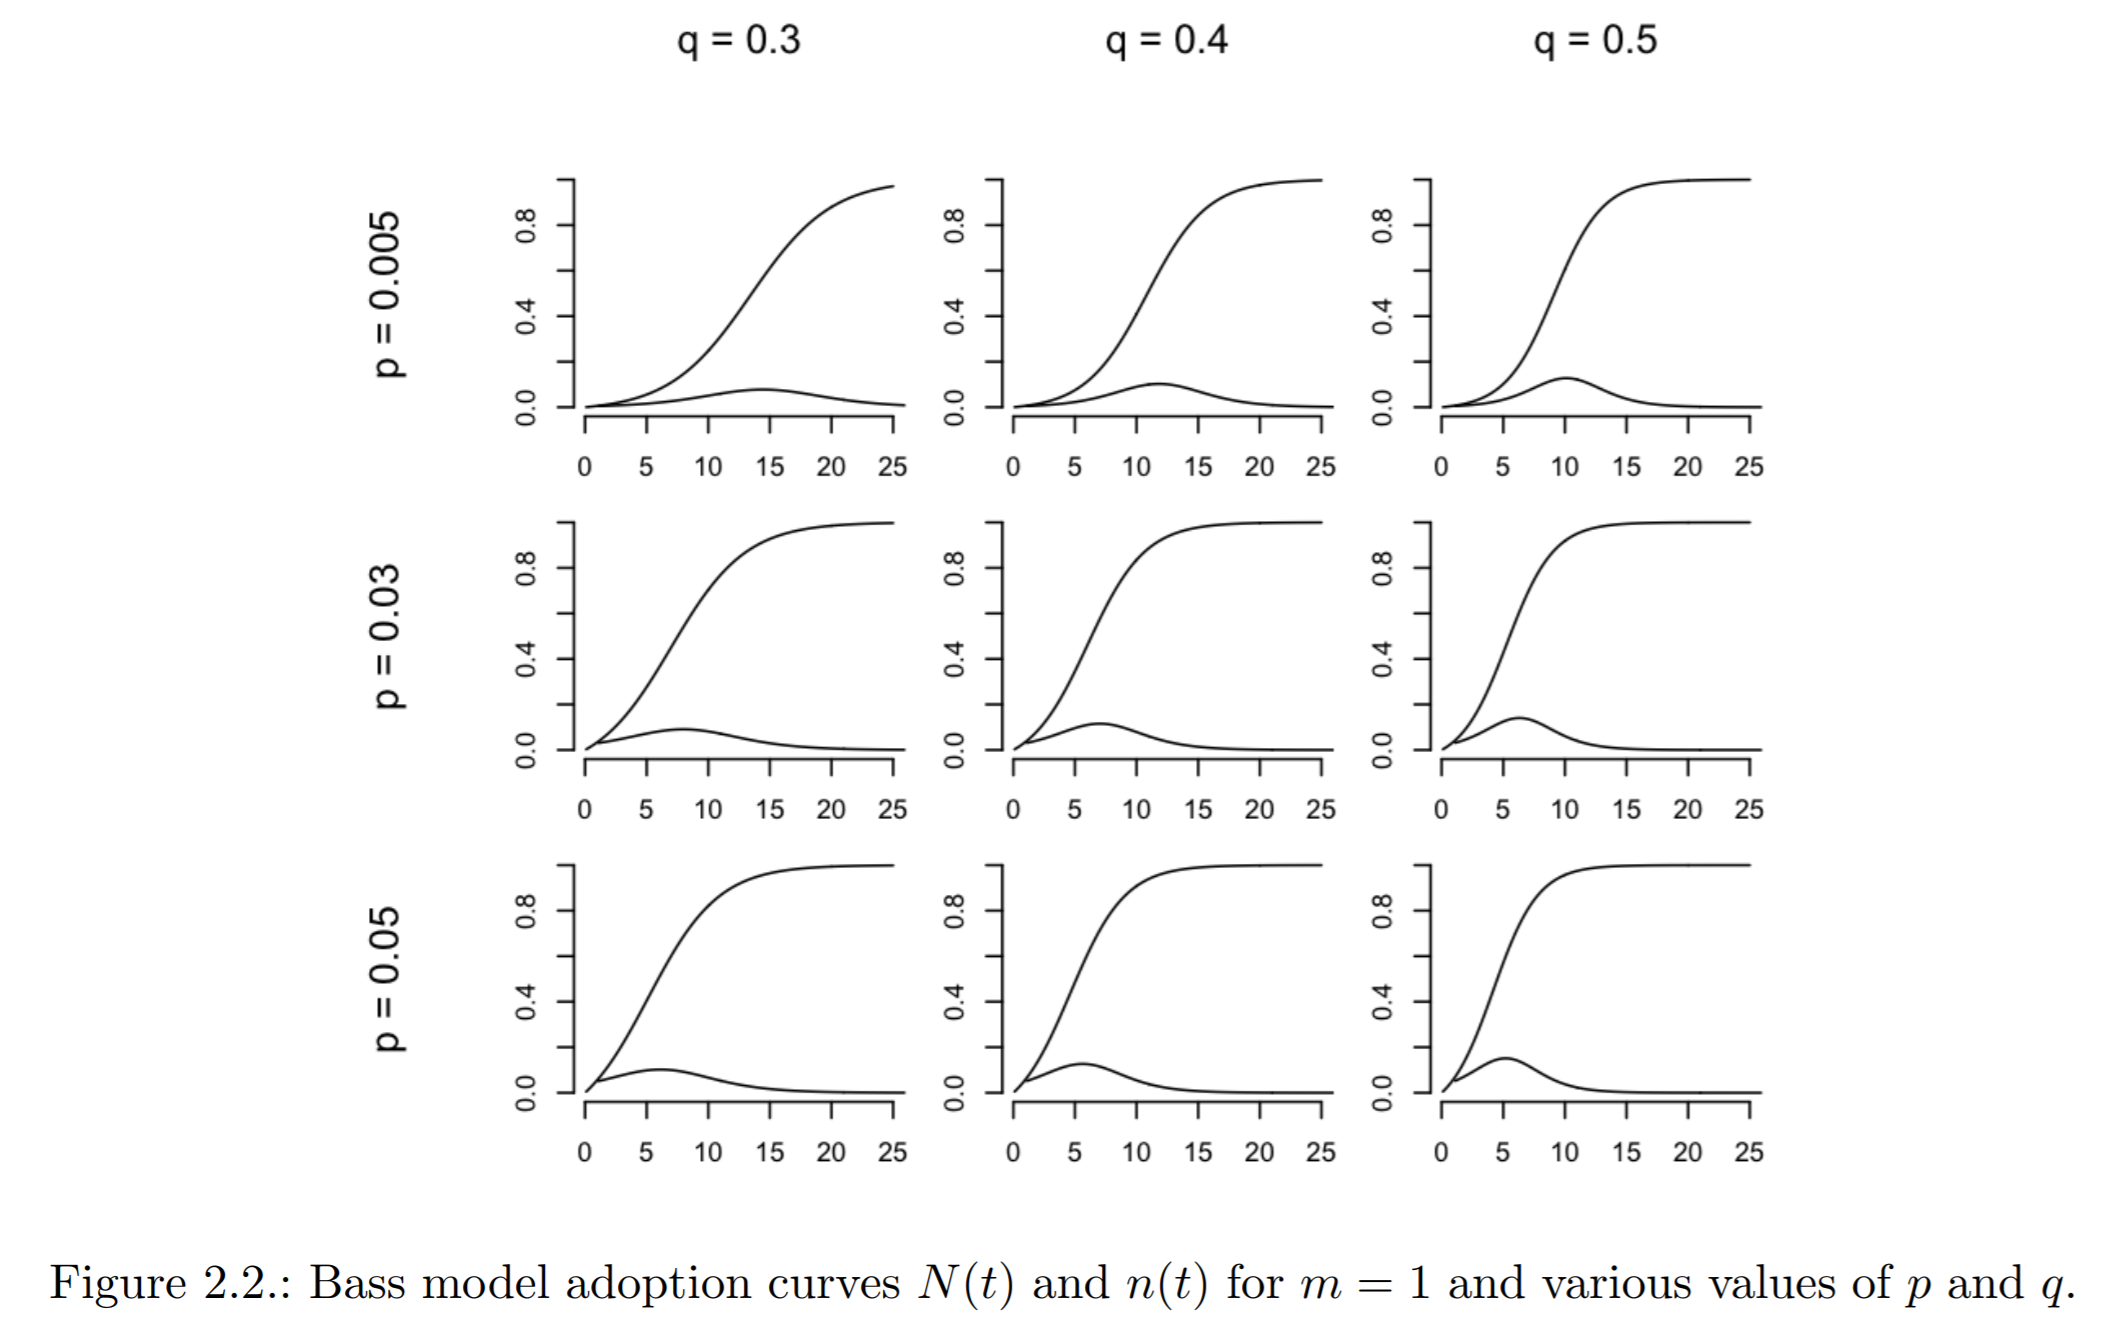

In [26]:
from IPython.display import Image
Image("adoption-curves.png")

N(t) is the typical Bass S-curve and n(t) is a skewed bell curve of new adoptions. This visualization is a perfect example of how your company's advertising efforts have heavy influence on the adoption process. Likewise, a large q value or the internal influencers can speed up diffusion.  

### Agent-based Research in the Area of Innovation Diffusion

The Bass model described above is one way, and the most popular way, of modeling diffusion at an aggregate level. There are strengths and weaknesses to modeling diffusion like this. It carries a lot of weight in terms of analytical tractability and gives you a way of analyzing the market as a whole. However, aggregate models fail to reproduce how different consumers are from each other - varying purchasing power, personal preferences, availabilty of information, etc.  Agent-based modeling and simulation (ABMS) aims to alleviate these limitations. In my opinion Elmar Kiesling describes the use of ABMS in innovation diffusion modeling beautifuly: 

> "It is
a bottom-up modeling approach that aims to capture emergent phenomena in complex systems
on the macro-level by simulating the behavior and interactions of entities on the micro-level.
Hence, a key distinguishing feature of this approach is that it does not examine relationships
between macro-level variables directly, but rather aims to capture the behavior of individuals
explicitly by modeling the rules they employ and the interactions they engage in, with the
aim of obtaining a bottom-up causal model."

I think the appeal of ABMS is pretty obvious and for all these reasons it's why I used this method to model new product diffusion. In Kiesling's dissertation he provides an agent-based formulation of the Bass model that I used directly for my simulation. Here is what the algorithm looks like: 

In [ ]:
from IPython.display import Image
Image("ABM Bass Diffusion.png")

Seeing that it is Kiesling's formulation, I want to do it justice by letting him explain its elements and principles behind it in his language instead of my nonchalant style of voice. Again, this is taken from his dissertation which I have provided a link to in the [preface](https://core.ac.uk/download/pdf/11596692.pdf) and you can reference pages 22-24 to follow along. 

> This model consists of M agents indexed by i = 1, . . . , M, each of which is in either of two states:
“potential adopter” or “adopter”. We use a set of variables x = ($x_i$, . . . , $x_M$) ∈ {0, 1} to describe the agents’ adoption state (i.e., $x_i$ = 1 iff agent i has adopted). In the Bass model, each actor’s probability to adopt at time $t + \Delta t$, given that it has not
adopted by time t, is described by the hazard model in Equation 2.1. In the analogous agent-based formulation in discrete time, we can use agents’ explicit state variable $x_i$ rather than the cumulative distribution function of adoptions $F(t)$. Agent i’s probability to transition from non-adopter to adopter state is given as a function of the state of the system X as follows:

In [ ]:
from IPython.display import Image
Image("ABM Bass Math formula.png")

> Analogously to the Bass model, the probability of agent i to adopt, given that it has not adopted so far, depends linearly on an independent external influence p and an internal influence q that depends of the fraction of prior adopters. The formulation implies homogeneity and global interconnectedness, i.e., each agent’s individual probability of adoption is influenced uniformly by the adoption state of all other agents. Obviously, $f(x)$ = 0 ∀ i for which $x_i$ = 1 and $f(x)$ ∈ [0, 1] ∀ i for which $x_i$ = 0, i.e., all agent that already have adopted remain in adopter state and all agents that have not adopted may switch their state with the same probability in the current period. 
>  Algorithm 1 presents a discrete time/synchronous updating formulation of the Bass model. The latter is achieved by a temporary variable $\bar{x}$ which is used to store the new state of the system until the end of the period, when the actual updating occurs. In each time period t until the simulation horizon T, the algorithm decides for each agent i whether or not it adopts based on the adoption probability according to Equation 2.5 and a random value rand drawn from X(ω) ∼ U(0, 1) (lines 7-8). If an agent adopts, the temporary variable $\bar{x}$ is updated accordingly (line 9). As soon as all agents have made their adoption decisions, the state of the system is updated (line 12). Then, the cumulative number of adopters by time t is determined by summing over x (line 13) and stored in a vector adoptions, which the algorithm returns after iterating over all periods (line 15).

By now my hope is that you have a basic understanding of diffusion modeling from the aggregate and the disaggregate level and the elements of the ABMS formula used in the rest of this introduction. As another preface, I am somewhat new to programming with Python so please forgive me if there are errors or my code lacks organizational inefficiency - please let me know if there are edits that I should make to increase performance or just make it better in general!! 

In [2]:
import pandas as pd
from numpy import *
from math import *
import matplotlib.pyplot as plt

def dfsn_abm(p, q, M, T):
    adopt = list()
    x = zeros((M,), float32)
    x_temp = zeros((M,), float32)
    adoptions = pd.DataFrame(arange(1,T), columns = ['time'])
    for t in range(T):
        for i in range(1,M):
            prob = (p + q * (sum(x) / M)) * (1 - x[i])
            if random.uniform(0,1,1) <= prob:
                x_temp[i] = 1
        x = x_temp
        adopt.append(sum(x))
    return adopt

In [2]:
sim_dfsn = [dfsn_abm(0.01, 0.3, 1000, 25) for _ in range(25)]

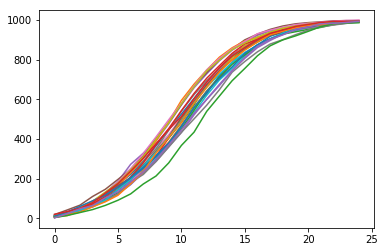

In [13]:
df = pd.DataFrame(array(sim_dfsn))
df = df.transpose()

df.plot(legend = None)

In [ ]:
df['time'] = range(1,26)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [11]:
a = df.columns[range(1,26)]
b = ['sim ' + str(i) for i in range(1,len(a)+1)]
d = dict(zip(a, b))
df = df.rename(columns = d)
df

,time,sim 1,sim 2,sim 3,sim 4,sim 5,sim 6,sim 7,sim 8,sim 9,...,sim 16,sim 17,sim 18,sim 19,sim 20,sim 21,sim 22,sim 23,sim 24,sim 25
0,1,14.0,6.0,10.0,7.0,11.0,19.0,8.0,8.0,8.0,...,13.0,15.0,9.0,14.0,9.0,11.0,4.0,4.0,20.0,2.0
1,2,29.0,14.0,25.0,21.0,29.0,42.0,23.0,22.0,18.0,...,30.0,30.0,24.0,27.0,23.0,32.0,18.0,14.0,34.0,23.0
2,3,55.0,37.0,41.0,41.0,54.0,66.0,37.0,40.0,44.0,...,53.0,55.0,43.0,53.0,41.0,60.0,31.0,29.0,51.0,48.0
3,4,84.0,62.0,64.0,68.0,83.0,110.0,64.0,65.0,69.0,...,86.0,86.0,62.0,86.0,60.0,88.0,58.0,44.0,79.0,64.0
4,5,122.0,96.0,100.0,100.0,127.0,146.0,94.0,96.0,111.0,...,121.0,129.0,90.0,132.0,92.0,116.0,83.0,65.0,127.0,103.0
5,6,171.0,144.0,148.0,144.0,186.0,196.0,130.0,145.0,152.0,...,165.0,184.0,122.0,178.0,144.0,157.0,116.0,91.0,175.0,134.0
6,7,221.0,194.0,198.0,190.0,272.0,247.0,184.0,207.0,206.0,...,204.0,250.0,181.0,243.0,194.0,204.0,174.0,123.0,237.0,183.0
7,8,288.0,245.0,262.0,256.0,328.0,315.0,257.0,285.0,259.0,...,269.0,327.0,221.0,311.0,264.0,257.0,235.0,173.0,303.0,235.0
8,9,365.0,314.0,338.0,312.0,390.0,403.0,348.0,350.0,339.0,...,337.0,410.0,286.0,398.0,333.0,316.0,328.0,213.0,376.0,296.0
9,10,448.0,384.0,404.0,405.0,476.0,483.0,421.0,443.0,408.0,...,410.0,496.0,359.0,481.0,408.0,379.0,408.0,279.0,447.0,370.0


<Figure size 1440x720 with 0 Axes>

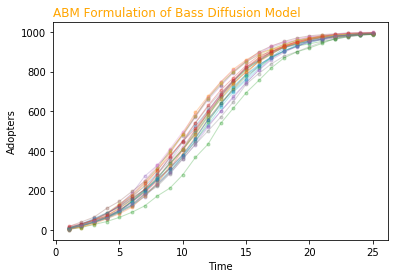

<Figure size 1440x720 with 0 Axes>

In [30]:
num=0
for column in df.drop('time', axis=1):
    num+=1
    plt.plot(df['time'], df[column], marker='.', linewidth=1, alpha=0.3, label=column)

plt.title("ABM Formulation of Bass Diffusion Model", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Adopters")
plt.figure(figsize=(20,10))

To run another simulation, let's consider a new company might not have many resources to heavily market or advertise the product but the word-of-mouth influence is significant. 

In [13]:
sim_dfsn2 = [dfsn_abm(0.005, 0.4, 1000, 25) for _ in range(25)]

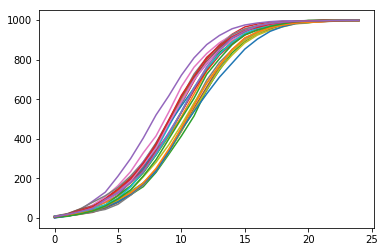

In [14]:
df = pd.DataFrame(array(sim_dfsn2))
df = df.transpose()

df.plot(legend = None)

In [15]:
df['time'] = range(1,26)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [16]:
a = df.columns[range(1,26)]
b = ['sim ' + str(i) for i in range(1,len(a)+1)]
d = dict(zip(a, b))
df = df.rename(columns = d)

<Figure size 1440x720 with 0 Axes>

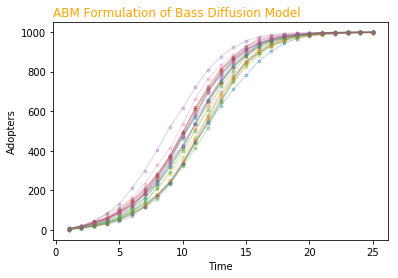

<Figure size 1440x720 with 0 Axes>

In [17]:
num=0
for column in df.drop('time', axis=1):
    num+=1
    plt.plot(df['time'], df[column], marker='.', linewidth=1, alpha=0.3, label=column)

plt.title("ABM Formulation of Bass Diffusion Model", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Adopters")
plt.figure(figsize=(20,10))

We can see that compared to the first run of the model that the time to full adoption was somewhere between 20-25. With a larger q, the time for full adoption is decreased to somewhere between 15-20.

Lastly, let's consider a company has a large budget for mass communication and advertising of the new product - resulting in a large p. 

In [18]:
sim_dfsn3 = [dfsn_abm(0.05, 0.3, 1000, 25) for _ in range(25)]

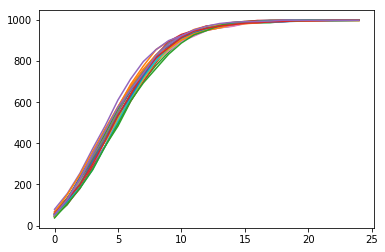

In [19]:
df = pd.DataFrame(array(sim_dfsn3))
df = df.transpose()

df.plot(legend = None)

Again, here we can see that the time to full adoption is cut and falls in the range of 10-15. As a marketer it is nice to see the fruits of your labor and how much marketing efforts really impact the popularity growth of the new product. 

### Future Research

This might seem like a common-sense idea...obviously if you are able to have a greater external influence on your target market then they are more likely to purchase and adopt your product and to some extent I would agree with you. In my future research I am hoping to address this and create something that will allow us to peel back one more layer of granularity. Eventually I want to find the optimal value of p based on the type of agent. This will result in a more micro-targeted approach to marketing. Additionally, we will be able to discover the ideal mix of innovators and early-adopters to target so that they will propagate the new product faster throughout the market. 